<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [38]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

In [22]:
df = pd.read_table("wdbc.data", sep = ',', header=None)

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [25]:
#name df cols based on docs
df_cols=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se','concave_points_se', 'symetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst','concave_points_worst', 'symetry_worst', 'fractal_dimension_worst']
df.columns = df_cols

In [26]:
#change diagnosis col values to b:0, m:1
df.replace({'diagnosis' : { 'B' : 0, 'M' : 1}}, inplace=True)

In [27]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symetry_mean             569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
del df['id']

In [30]:
print(df.shape)

(569, 31)


### Visual EDA

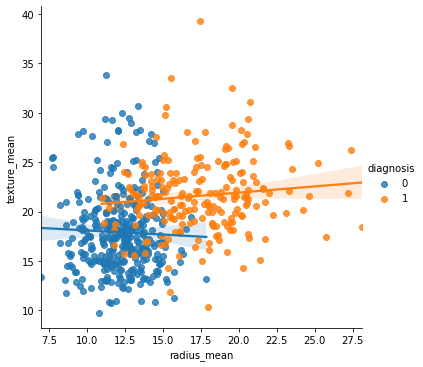

In [39]:
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = df)

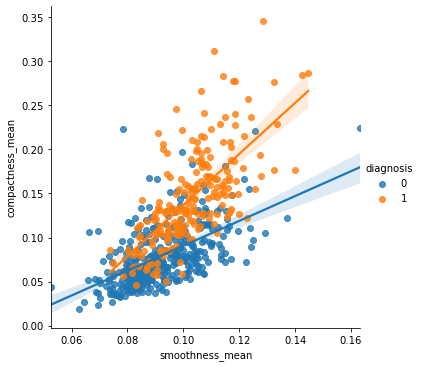

In [40]:
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = df, hue = 'diagnosis')

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [47]:
X = np.array(df.drop(['diagnosis'], 1).astype(float))
y = df[['diagnosis']]

<ipython-input-47-94f1a13df724>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['diagnosis'], 1).astype(float))


### 4. What is the baseline accuracy?

In [7]:
# ANSWER
#this would be the most frequently occuring class. can use mean/mode and find out whats closer
y.mean()

diagnosis    0.372583
dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [48]:
# ANSWER
y.value_counts()

diagnosis
0            357
1            212
dtype: int64

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [16]:
# ANSWER
from sklearn.neighbors import KNeighborsClassifier
# Make an instance of a KNeighborsClassifier object with 1 neighbor
neigh = KNeighborsClassifier
knn = neigh(n_neighbors = 1)

#knn=KNeighboursClassifier(n=1)
# fit on the unstandardized data:
knn.fit(X,y)

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [19]:
knn.score(X,y)

1.0

In [17]:
from sklearn.model_selection import train_test_split#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [18]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
knn.score(X_train,y_train)

1.0

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [50]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# STEP 2: train the model on the training set (using K=1)
neigh = KNeighborsClassifier
knn = neigh(n_neighbors = 1)
knn.fit(X_train,y_train)
# STEP 3: test the model on the testing set, and check the accuracy
knn.score(X_test,y_test)

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9122807017543859

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [61]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
neigh = KNeighborsClassifier
knn = neigh(n_neighbors = len(X_train))
# Fit Train Data
knn.fit(X_train,y_train)
# Print accuracy_score
knn.score(X_test,y_test)

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.631578947368421

In [62]:
#check baseline
1 - y.mean()

diagnosis    0.627417
dtype: float64

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [65]:
# ANSWER
# plot test accuracy by number of neighbors:
#you need 2 lists to store all values, 1 for accuracy, 1 for # of neighbours
neigh = KNeighborsClassifier
knn = neigh(n_neighbors = len(X_train))

#1. create lists
accuracy_list = []
neighbours_list = []

#3. fit and predict
knn.fit(X_train,y_train)
#plot accuracy by number of neighbours:
start = 1
stop = len(X_train) + 1

for k in range(start, stop):
    #2. instatiate model
    neigh = KNeighborsClassifier
    knn = neigh(n_neighbors =k)
    #3 fit and score
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    #4 append to list
    accuracy_list.append(score)
    neighbours_list.append(k)
    

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

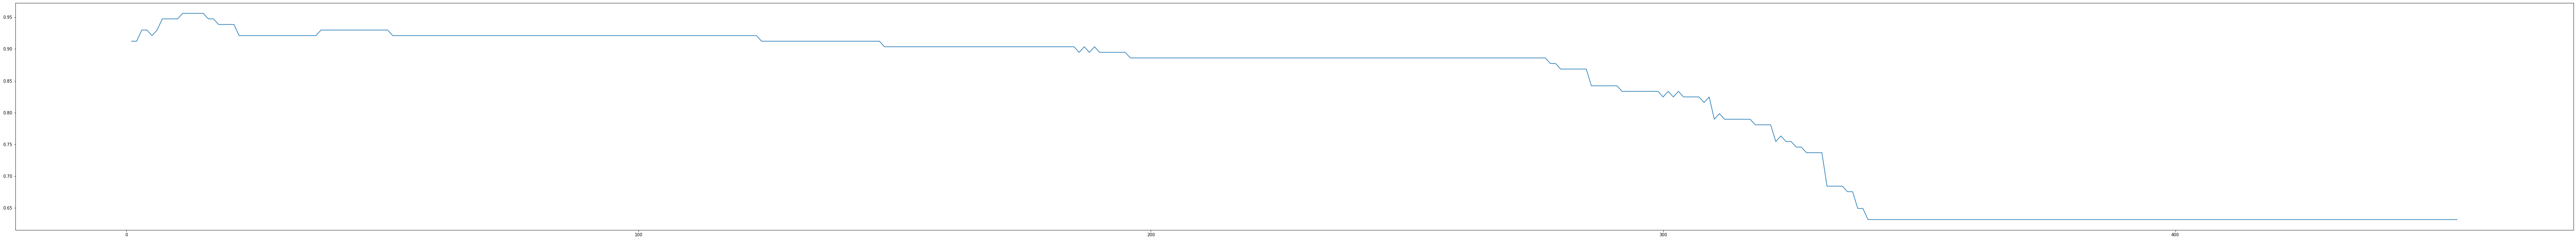

In [66]:
plt.figure(figsize=(110,10))
plt.plot(neighbours_list, accuracy_list)

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [69]:
from sklearn.model_selection import cross_val_score
# ANSWER
# ANSWER
# plot test accuracy by number of neighbors:
#you need 2 lists to store all values, 1 for accuracy, 1 for # of neighbours

#1. create lists
accuracy_list = []
neighbours_list = []

#3. fit and predict
knn.fit(X_train,y_train)

#plot accuracy by number of neighbours:
start = 1
stop = len(X_train) + 1

for k in range(start, 20):
    #2. instatiate model
    neigh = KNeighborsClassifier
    knn = neigh(n_neighbors = k)
    #3 fit and score
    knn.fit(X_train,y_train)
    #cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
#    mean_score = score.mean #see if this is correct. check score values
    #4 append to list
    accuracy_list.append(score) #see if this is correct. check score values
    neighbours_list.append(k)
    

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


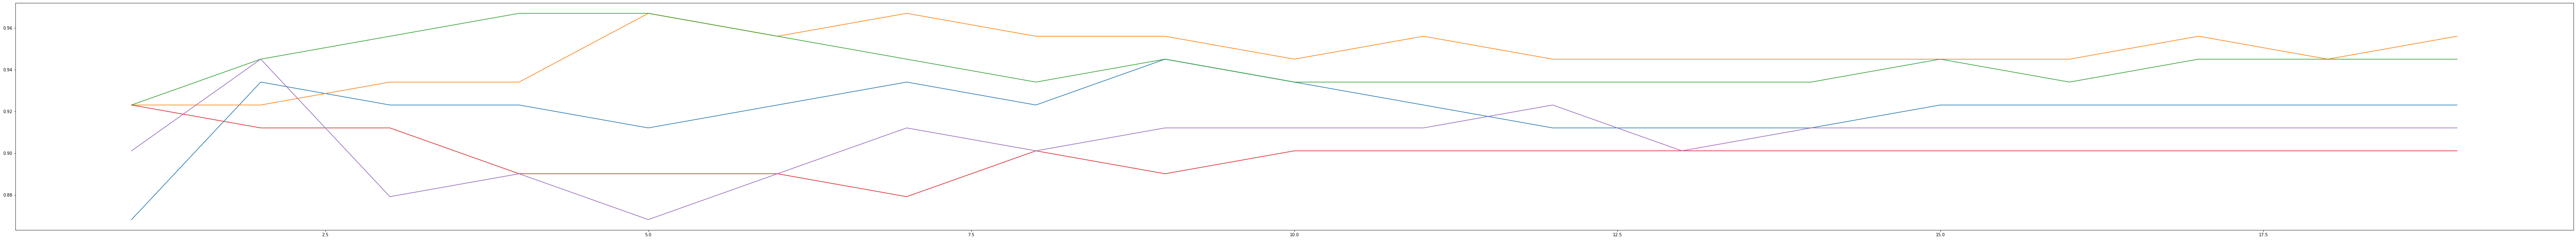

In [70]:
plt.figure(figsize=(110,10))
plt.plot(neighbours_list, accuracy_list)

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [71]:
# ANSWER
# Standarize X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [0]:
# ANSWER
# plot test accuracy by number of neighbors:

In [72]:
from sklearn.model_selection import cross_val_score
# ANSWER
# ANSWER
# plot test accuracy by number of neighbors:
#you need 2 lists to store all values, 1 for accuracy, 1 for # of neighbours

#1. create lists
accuracy_list = []
neighbours_list = []

#3. fit and predict
knn.fit(X_train,y_train)

#plot accuracy by number of neighbours:
start = 1
stop = len(X_train) + 1

for k in range(start, 20):
    #2. instatiate model
    neigh = KNeighborsClassifier
    knn = neigh(n_neighbors = k)
    #3 fit and score
    knn.fit(X_train,y_train)
    #cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
#    mean_score = score.mean #see if this is correct. check score values
    #4 append to list
    accuracy_list.append(score) #see if this is correct. check score values
    neighbours_list.append(k)
    

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lawrenceyim/opt/miniconda3/envs/test/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: Data

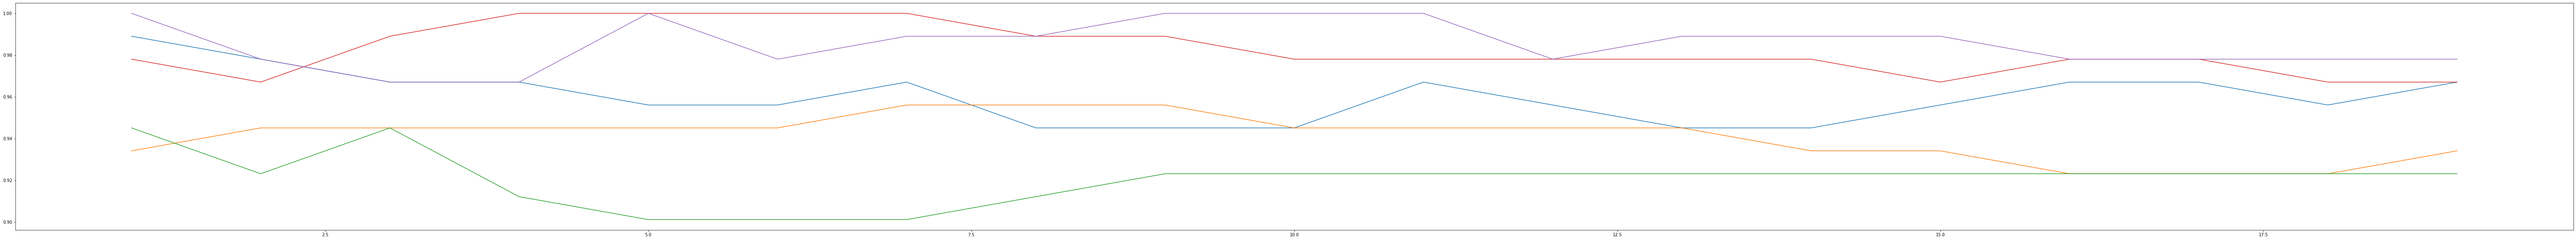

In [73]:
plt.figure(figsize=(110,10))
plt.plot(neighbours_list, accuracy_list)

In [74]:
print(accuracy_list)

[array([0.98901099, 0.93406593, 0.94505495, 0.97802198, 1.        ]), array([0.97802198, 0.94505495, 0.92307692, 0.96703297, 0.97802198]), array([0.96703297, 0.94505495, 0.94505495, 0.98901099, 0.96703297]), array([0.96703297, 0.94505495, 0.91208791, 1.        , 0.96703297]), array([0.95604396, 0.94505495, 0.9010989 , 1.        , 1.        ]), array([0.95604396, 0.94505495, 0.9010989 , 1.        , 0.97802198]), array([0.96703297, 0.95604396, 0.9010989 , 1.        , 0.98901099]), array([0.94505495, 0.95604396, 0.91208791, 0.98901099, 0.98901099]), array([0.94505495, 0.95604396, 0.92307692, 0.98901099, 1.        ]), array([0.94505495, 0.94505495, 0.92307692, 0.97802198, 1.        ]), array([0.96703297, 0.94505495, 0.92307692, 0.97802198, 1.        ]), array([0.95604396, 0.94505495, 0.92307692, 0.97802198, 0.97802198]), array([0.94505495, 0.94505495, 0.92307692, 0.97802198, 0.98901099]), array([0.94505495, 0.93406593, 0.92307692, 0.97802198, 0.98901099]), array([0.95604396, 0.93406593, 0.

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



